In [1]:
# Application of Bayes’ Theorem:

import numpy as np

# We can define a function in Python that accepts a list of priors and corresponding likelihoods. 
# Our function will compute the marginal (marg) and then use Bayes' Theorem to calculate the posterior 
# probabilities for the each of the hypotheses (post).
def bayes_rule(priors, likelihoods):
    marg = sum(np.multiply(priors, likelihoods))
    post = np.divide(np.multiply(priors, likelihoods), marg)
    return post

In [2]:
# Suppose we have 3 jars with 100 marbles in each.
#      Jar 1 has 40 blue marbles, 30 red marbles, and 30 green marbles.
#      Jar 2 has 60 blue marbles, 20 red marbles, and 20 green marbles.
#      Jar 3 has 10 blue marbles, 30 red marbles, and 70 green marbles.
#  You pick a marble from one of the jars at random, and the marble is green. 
# What are the probabilities that the marble came from each of the three jars?

priors = [1/3, 1/3, 1/3]
likelihoods = [0.3, 0.2, 0.7]
bayes_rule(priors, likelihoods)

array([0.25      , 0.16666667, 0.58333333])

In [3]:
# Suppose you had picked a blue marble instead of a green one. 
# We would just need to update our likelihoods to account for the proportion of each jar whose marbles were blue.

likelihoods = [0.4, 0.6, 0.1]
bayes_rule(priors, likelihoods)

array([0.36363636, 0.54545455, 0.09090909])

# Bayesian Data Analysis:

In [11]:
# Example: Suppose we have just launched an online store that sells fidget spinners, and we are trying to 
# estimate what percentage of visitors to our online store will make a purchase. 
#We can set this up as a Bayesian problem and arrive at a probability distribution as follows.

# Generate uniform distribution priors:

import pandas as pd
import matplotlib as plt

n_draws = 100000
prior = pd.Series(np.random.uniform(0, 1, size=n_draws))

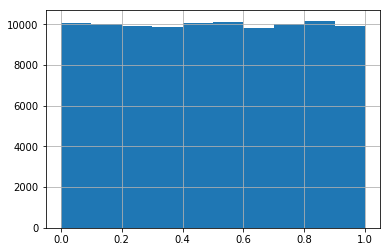

In [12]:
prior.hist()

In [6]:
# Now it's time to observe some data and see how this affects our estimates. 
# Suppose on the first day, 50 people visited our site and 10 of them made a purchase. We are going to record the number of purchases in a variable called observed.

observed = 10

In [7]:
# Create a generative model that will randomly draw from our prior uniform distribution, 
# simulate 50 people coming to our website a large number of time, and see how many times we get a result 
# that is in line with the result we have observed. 

def generative_model(param) :
    result = np.random.binomial(50, param)
    return result

In [8]:
# WCreate a empty list that is going to contain our simulated results & populate it:

sim_data = list()
for p in prior:
    sim_data.append(generative_model(p))

In [9]:
# Generate posterior distribution:  select only the values from our prior distribution that generated instances 
# where the simulated result matched our observed result of 10 purchases.

posterior = prior[list(map(lambda x: x == observed, sim_data))]

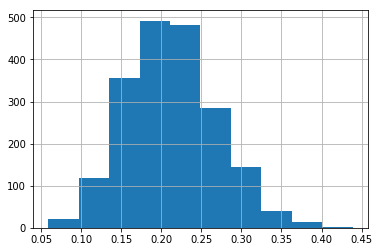

In [13]:
posterior.hist()